<a href="https://colab.research.google.com/github/IsaiahejWashington/MLA_IEW/blob/main/MLA3_IEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
Isaiah Washington

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [4]:
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

## Imports for Splitting Data and Building Pipeline


In [5]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [47]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [48]:
def abline(slope, intercept, color):
  axes = plt.gca()
  x_vals = np.array(axes.get_xlim())
  y_vals = intercept + slope *  x_vals
  plt.plot(x_vals, y_vals, '--', c=color)

# ROC_Curve Function
This function is for plotting the roc_curve

In [49]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [50]:
df = pd.read_csv('/content/gdrive/MyDrive/cs405/banknote_authentication.csv')
df.head(5)

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Statistical and Visual Exploration

In [51]:
numerical_summary = df.describe()
print(numerical_summary)

          variance     skewness     curtosis      entropy      forgery
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [52]:
forgery_counts = df['forgery'].value_counts().reset_index()
forgery_counts.columns = ['forgery', 'count']
forgery_counts['forgery'] = forgery_counts['forgery'].map({0: 'Real', 1: 'Forgery'})
print(forgery_counts)

   forgery  count
0     Real    762
1  Forgery    610


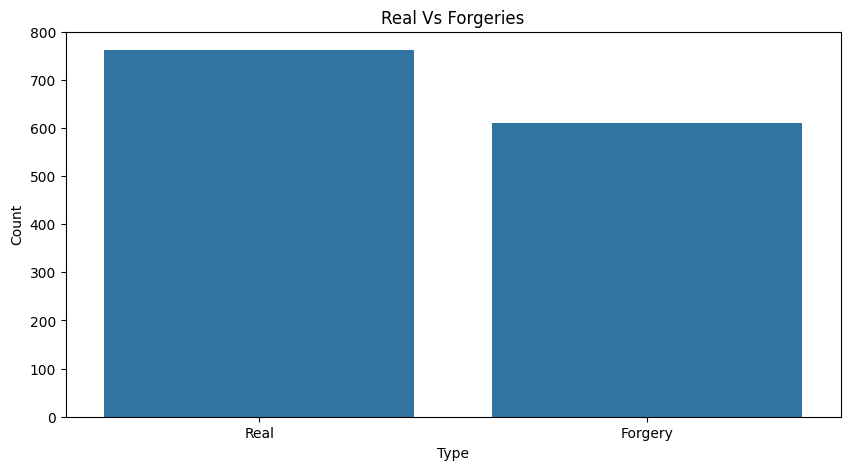

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(x='forgery', y='count', data=forgery_counts)
plt.title('Real Vs Forgeries')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

<Figure size 1200x800 with 0 Axes>

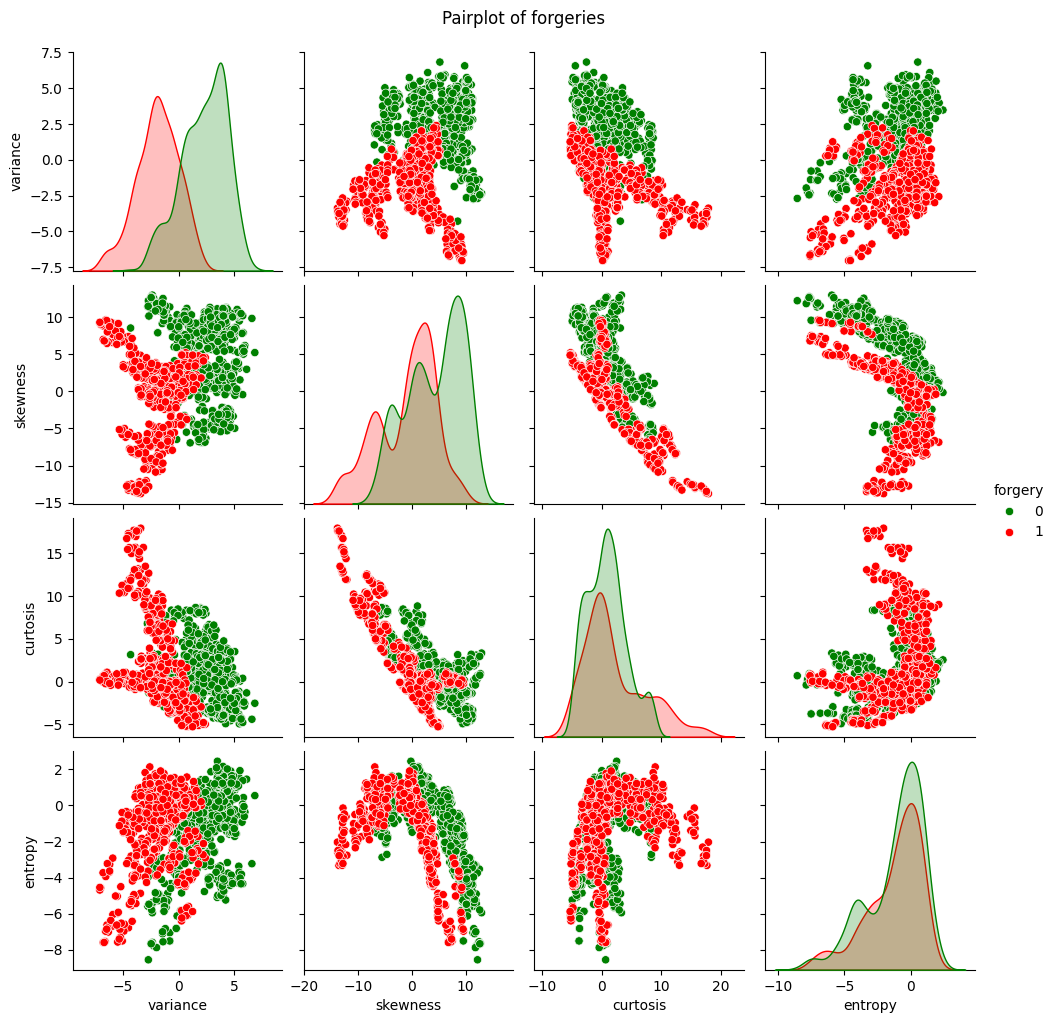

In [21]:
plt.figure(figsize=(12,8))
sns.pairplot(df, hue='forgery', palette={0: 'green', 1:'red'})
plt.suptitle("Pairplot of forgeries", y=1.02)
plt.show()

Given the pairplots one can deduce that real money represented by the green dots have a higher chance of skewness. Forgeries are more likely to have negative curtosis. Real notes have more variance than forgeries do.

### Splitting Data into Train/Test

In [29]:
X= df.drop('forgery', axis=1)
y = df['forgery']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X and y trains")
print(X_train.shape)
print(y_train.shape)
print("X and y tests")
print(X_test.shape)
print(y_test.shape)

print("X and y trains")
print(X_train.head())
print(y_train.head())

X and y trains
(1097, 4)
(1097,)
X and y tests
(275, 4)
(275,)
X and y trains
      variance  skewness  curtosis   entropy
529   -1.38850   12.5026   0.69118 -7.548700
243    2.77440    6.8576  -1.06710  0.075416
1309  -4.28870   -7.8633  11.83870 -1.897800
664    5.35860    3.7557  -1.73450  1.078900
745    0.75736    3.0294   2.91640 -0.068117
529     0
243     0
1309    1
664     0
745     0
Name: forgery, dtype: int64


### Building the Pipeline

In [56]:
numeric_features = ['variance', 'skewness', 'curtosis', 'entropy']
numeric_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers = [('num', numeric_transformer, numeric_features)]
)

svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', random_state=42))
])

svm_pipeline.fit(X_train, y_train.values.ravel())

model=SVC(kernel="poly", degree =2, C=1, max_iter=10000)
model.fit(X_train, y_train)



SVC(C=1, degree=2, kernel='poly', max_iter=10000)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.99      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

Predictions


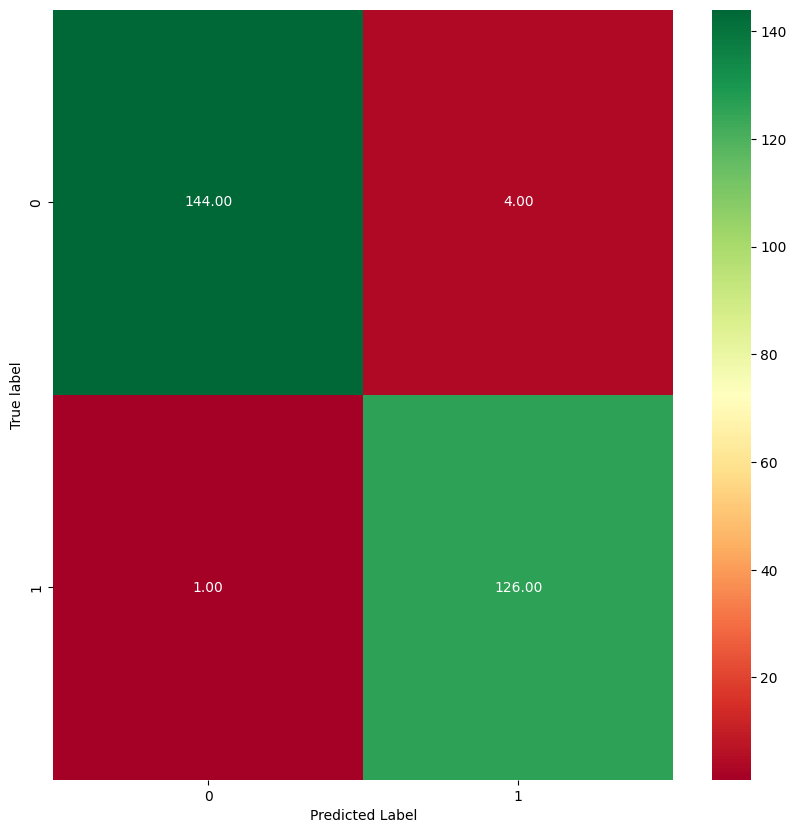

In [59]:
y_pred = svm_pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Predictions")
plot_cm(y_test, y_pred)

### Executing the Model

In [67]:
sample_data = X_test.head(5)
print(sample_data)
print("Predicted values")
print(svm_pipeline.predict(sample_data))
print("Actual values")
print(y_test.head(5))


     variance  skewness  curtosis  entropy
430  1.569100    6.3465   -0.1828  -2.4099
588 -0.278020    8.1881   -3.1338  -2.5276
296  0.051979    7.0521   -2.0541  -3.1508
184 -1.755900   11.9459    3.0946  -4.8978
244  2.428700    9.3821   -3.2477  -1.4543
Predicted values
[0 0 0 0 0]
Actual values
430    0
588    0
296    0
184    0
244    0
Name: forgery, dtype: int64


### Evaluating Model

0.9692307692307692
0.9921259842519685
0.980544747081712


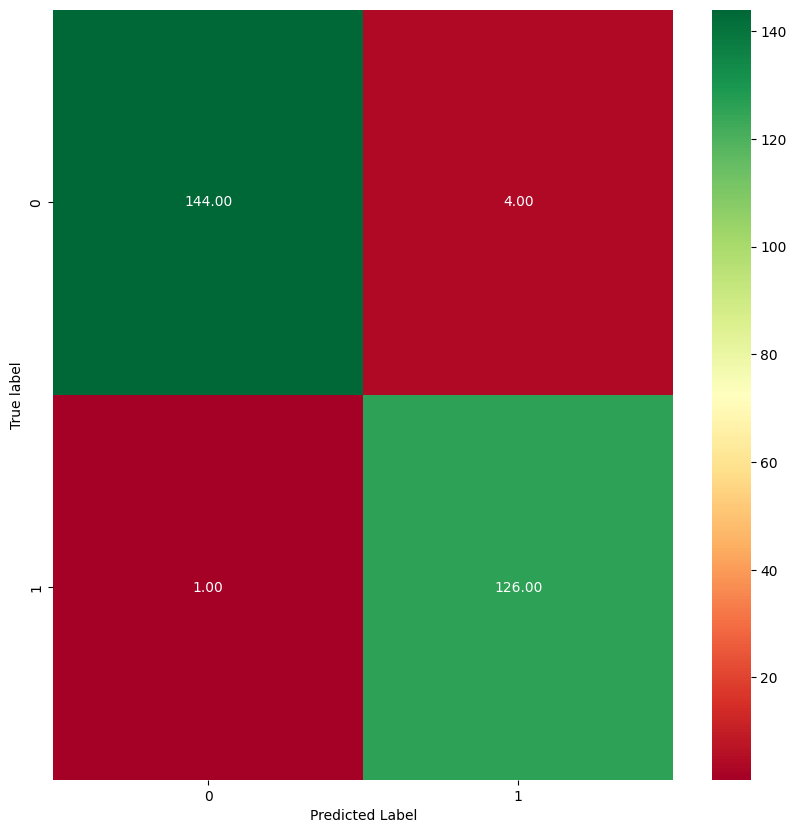

In [69]:
y_pred = svm_pipeline.predict(X_test)

plot_cm(y_test, y_pred)

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

### Conclusion
Write a general conclusion about the results of your model.

## Problem 2

### Reading the Data

### Splitting Data into Train/Test

### Building the Pipeline

### Executing the Model

### Evaluating Model

### Conclusion
Write a general conclusion about the results of your model.